# TSF-GRIP
# Unsupervised ML - KMeans Clustering
## Developed by Avura Jerry Ugbomine

In [162]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
# loading the dataset

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [164]:
# Dropping the Id column

data_drop1 = data.drop('Id', axis = 'columns')
data_drop1.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [165]:
# Dropping the Species column

data_drop2 = data_drop1.drop('Species', axis = 'columns')
data_drop2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [166]:
# Checking the number of rows and columns of the dataset

data_drop2.shape

(150, 4)

In [167]:
# Checking for missing values

data_drop2.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

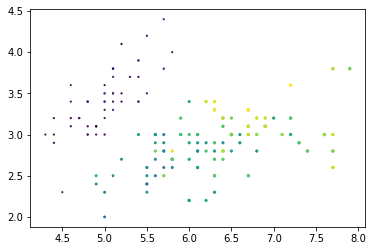

In [117]:
# Plotting scatter plot of the data

plt.scatter(data_drop2['SepalLengthCm'], data_drop2['SepalWidthCm'], data_drop2['PetalLengthCm'], data_drop2['PetalWidthCm'])

In [118]:
# Fitting the model

from sklearn.cluster import KMeans
k_range = range(1,10) #range of k values
sse = []
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(data_drop2)
    sse.append(km.inertia_) # inertia is the sse

In [119]:
# Sum of square error

sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.1967910993998,
 29.955568877177583,
 28.28350503482027]

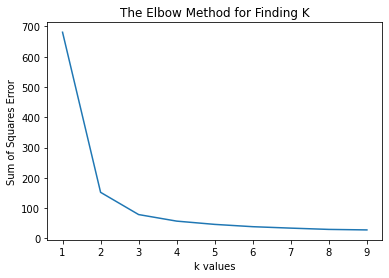

In [120]:
# Plotting the elbow curve to find the value of k

plt.plot(k_range, sse)
plt.xlabel('k values')
plt.ylabel('Sum of Squares Error')
plt.title('The Elbow Method for Finding K')
plt.show()

In [121]:
# Elbow value of k is 3
# Now, using k = 3 to fit the classifier

k_value = KMeans(n_clusters = 3)
y_predicted = k_value.fit_predict(data_drop2)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [122]:
# Printing the center values or centroids for each cluster

print(k_value.cluster_centers_)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [168]:
# Appending cluster column to the original dataset

data_drop2['cluster'] = y_predicted
data_drop2.head()
df =data_drop2
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


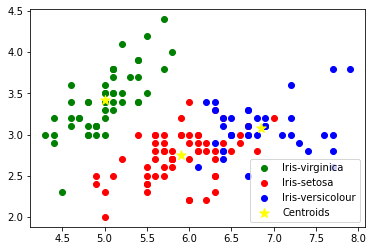

In [161]:
# Visualizaing the clusters

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.SepalLengthCm, df1['SepalWidthCm'], color = 'green', label = 'Iris-virginica')
plt.scatter(df2.SepalLengthCm, df2['SepalWidthCm'], color = 'red', label = 'Iris-setosa')
plt.scatter(df3.SepalLengthCm, df3['SepalWidthCm'], color = 'blue', label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(k_value.cluster_centers_[:, 0], k_value.cluster_centers_[:,1], s = 100, c = 'yellow', marker='*', label = 'Centroids')

plt.legend()